<a href="https://colab.research.google.com/github/shashwat9kumar/Image_Colorization_Using_Autoencoders/blob/master/Coloring_Images_using_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Kaggle/image_colorization/data.zip

Archive:  /content/drive/MyDrive/Kaggle/image_colorization/data.zip
   creating: data/
  inflating: data/Image_51.png       
  inflating: data/Community_Image_42.jpg  
  inflating: data/Image_83.jpg       
  inflating: data/NP_Image_20.jpg    
  inflating: data/Image_38.jpg       
  inflating: data/NP_Image_44.JPG    
  inflating: data/Image_42.jpg       
  inflating: data/Pets_Image_66.jpg  
  inflating: data/Image_35.png       
  inflating: data/Cityscapes_Image_71.jpg  
  inflating: data/Community_Image_38.jpg  
  inflating: data/Community_Image_55.jpg  
  inflating: data/Community_Image_29.jpg  
  inflating: data/Community_Image_8.jpg  
  inflating: data/Pets_Image_73.jpg  
  inflating: data/Pets_Image_74.jpg  
  inflating: data/NP_Image_27.jpg    
  inflating: data/NP_Image_85.JPG    
  inflating: data/NP_Image_69.jpg    
  inflating: data/Pets_Image_91.jpg  
  inflating: data/Pets_Image_2.jpg   
  inflating: data/Cityscapes_Image_2.jpg  
  inflating: data/Community_Image_76.jpg  

In [2]:
import tensorflow as tf
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

In [3]:
len(os.listdir("data/"))

500

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
vggmodel = VGG16()
vggmodel.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [6]:
def read_image_gray_2(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_image(image, channels=3)
    image = resize(image, output_shape=(224, 224))
    image_grey = rgb2gray(image)
    return image, image_grey

In [7]:
inputForModel = []
outputForModel = []


for img_path in os.listdir("data/"):
    try:
        path = "data/" + img_path
        img, gray_img = read_image_gray_2(path)
        inputForModel.append(gray2rgb(gray_img))
        outputForModel.append(img)
    except:
        continue

In [8]:
inputForModel = np.array(inputForModel)
outputForModel = np.array(outputForModel)

In [9]:
inputForModel.shape, outputForModel.shape

((496, 224, 224, 3), (496, 224, 224, 3))

In [10]:
inputForModel.min(), inputForModel.max()

(0.0, 1.0)

In [11]:
outputForModel.min(), outputForModel.max()

(0.0, 1.0)

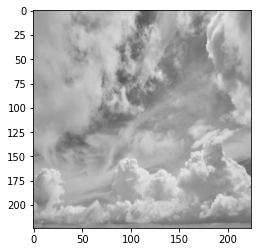

In [16]:
plt.imshow(inputForModel[19])

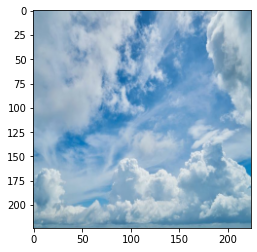

In [17]:
plt.imshow(outputForModel[19])

In [29]:
rgbmodel = Sequential()

for i, layer in enumerate(vggmodel.layers):
    if i<19:
        rgbmodel.add(layer)

for layer in rgbmodel.layers:
    layer.trainable = False

rgbmodel.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
rgbmodel.add(Conv2D(128, (3,3), activation='relu', padding='same'))
rgbmodel.add(UpSampling2D((2, 2)))
rgbmodel.add(Conv2D(64, (3,3), activation='relu', padding='same'))
rgbmodel.add(UpSampling2D((2, 2)))
rgbmodel.add(Conv2D(32, (3,3), activation='relu', padding='same'))
rgbmodel.add(UpSampling2D((2, 2)))
rgbmodel.add(Conv2D(16, (3,3), activation='relu', padding='same'))
rgbmodel.add(UpSampling2D((2, 2)))
rgbmodel.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
rgbmodel.add(UpSampling2D((2, 2)))
rgbmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
rgbmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [31]:
historyrgb = rgbmodel.fit(inputForModel, outputForModel, epochs=1000, batch_size=32)

Epoch 1/1000
16/16 [==============================] - 3s 146ms/step - loss: 0.7073 - accuracy: 0.2172
Epoch 2/1000
16/16 [==============================] - 2s 145ms/step - loss: 0.6966 - accuracy: 0.2398
Epoch 3/1000
16/16 [==============================] - 2s 148ms/step - loss: 0.6941 - accuracy: 0.2656
Epoch 4/1000
16/16 [==============================] - 2s 146ms/step - loss: 0.6924 - accuracy: 0.2756
Epoch 5/1000
16/16 [==============================] - 2s 147ms/step - loss: 0.6901 - accuracy: 0.2818
Epoch 6/1000
16/16 [==============================] - 2s 148ms/step - loss: 0.6880 - accuracy: 0.2619
Epoch 7/1000
16/16 [==============================] - 2s 148ms/step - loss: 0.6860 - accuracy: 0.2622
Epoch 8/1000
16/16 [==============================] - 2s 146ms/step - loss: 0.6844 - accuracy: 0.2913
Epoch 9/1000
16/16 [==============================] - 2s 148ms/step - loss: 0.6826 - accuracy: 0.3314
Epoch 10/1000
16/16 [==============================] - 2s 149ms/step - loss: 0.680

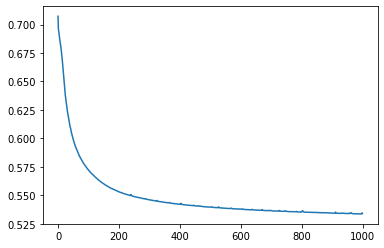

In [32]:
plt.plot(historyrgb.history['loss'])

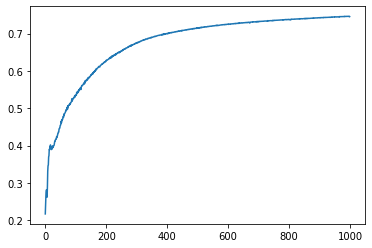

In [33]:
plt.plot(historyrgb.history['accuracy'])

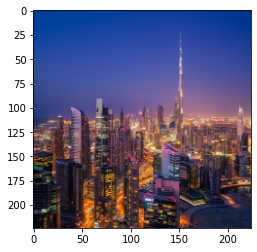

In [34]:
colored, gray = read_image_gray_2("/content/data/Cityscapes_Image_1.jpg")

plt.imshow(colored)


(224, 224, 3)


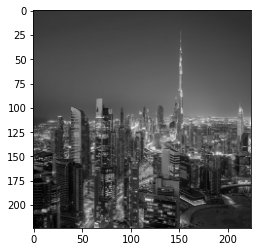

In [35]:

gray_image = gray2rgb(gray)
print(gray_image.shape)
plt.imshow(gray_image)

In [36]:
gray_image_input = np.expand_dims(gray_image, axis=0)
gray_image_input.shape

(1, 224, 224, 3)

In [37]:
colored_image_prediction = rgbmodel.predict(gray_image_input)
colored_image_prediction.shape

(1, 224, 224, 3)

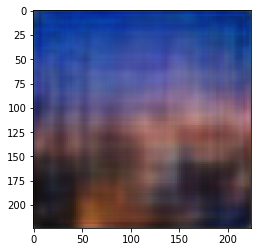

In [38]:
plt.imshow(np.squeeze(colored_image_prediction))

In [42]:
rgbmodel2 = Sequential()

for i, layer in enumerate(vggmodel.layers):
    if i<19:
        rgbmodel2.add(layer)

for layer in rgbmodel2.layers:
    layer.trainable = False

rgbmodel2.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
rgbmodel2.add(Conv2D(128, (3,3), activation='relu', padding='same'))
rgbmodel2.add(UpSampling2D((2, 2)))
rgbmodel2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
rgbmodel2.add(UpSampling2D((2, 2)))
rgbmodel2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
rgbmodel2.add(UpSampling2D((2, 2)))
rgbmodel2.add(Conv2D(16, (3,3), activation='relu', padding='same'))
rgbmodel2.add(UpSampling2D((2, 2)))
rgbmodel2.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
rgbmodel2.add(UpSampling2D((2, 2)))
rgbmodel2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [43]:
rgbmodel2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [44]:
historyrgb2 = rgbmodel2.fit(inputForModel, outputForModel, epochs=1000, batch_size=32)

Epoch 1/1000
16/16 [==============================] - 3s 144ms/step - loss: 0.6936 - accuracy: 0.3268
Epoch 2/1000
16/16 [==============================] - 2s 143ms/step - loss: 0.6852 - accuracy: 0.4151
Epoch 3/1000
16/16 [==============================] - 2s 144ms/step - loss: 0.6785 - accuracy: 0.4475
Epoch 4/1000
16/16 [==============================] - 2s 145ms/step - loss: 0.6698 - accuracy: 0.4760
Epoch 5/1000
16/16 [==============================] - 2s 145ms/step - loss: 0.6574 - accuracy: 0.4731
Epoch 6/1000
16/16 [==============================] - 2s 146ms/step - loss: 0.6428 - accuracy: 0.4865
Epoch 7/1000
16/16 [==============================] - 2s 147ms/step - loss: 0.6313 - accuracy: 0.4960
Epoch 8/1000
16/16 [==============================] - 2s 146ms/step - loss: 0.6189 - accuracy: 0.5119
Epoch 9/1000
16/16 [==============================] - 2s 147ms/step - loss: 0.6126 - accuracy: 0.5175
Epoch 10/1000
16/16 [==============================] - 2s 149ms/step - loss: 0.606

In [47]:
def read_image_lab(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_image(image, channels=3)
    image = resize(image, output_shape=(224, 224))
    image = rgb2lab(image)
    return image

In [48]:
i = read_image_lab("/content/data/Cityscapes_Image_1.jpg")

In [58]:
l = gray2rgb(i[:, :, 0]/100.)
ab = i[:, :, 1:]/128.

In [59]:
l.shape, ab.shape

((224, 224, 3), (224, 224, 2))

In [69]:
x = np.zeros((224,224,3))

x[:, :, 0] = l[:, :, 0]*100.
x[:, :, 1:] = ab*128.

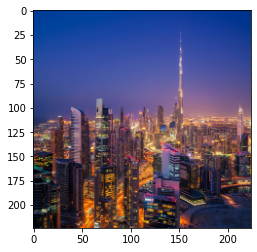

In [70]:
plt.imshow(lab2rgb(x))

In [97]:
X = []
Y = []

for img_path in os.listdir("data/"):
    try:
        path = "data/" + img_path
        img = read_image_lab(path)
        l = gray2rgb(img[:, :, 0]/100.)
        ab = img[:, :, 1:]/128.
        X.append(l)
        Y.append(ab)
    except:
        continue

In [98]:
X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((496, 224, 224, 3), (496, 224, 224, 2))

In [99]:
Y.min(), Y.max()

(-0.7651309632480918, 0.7316036128526665)

In [126]:
labmodel = Sequential()

for i, layer in enumerate(vggmodel.layers):
    if i<19:
        labmodel.add(layer)

for layer in labmodel.layers:
    layer.trainable = False

labmodel.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
labmodel.add(Conv2D(128, (3,3), activation='relu', padding='same'))
labmodel.add(UpSampling2D((2, 2)))
labmodel.add(Conv2D(64, (3,3), activation='relu', padding='same'))
labmodel.add(UpSampling2D((2, 2)))
labmodel.add(Conv2D(32, (3,3), activation='relu', padding='same'))
labmodel.add(UpSampling2D((2, 2)))
labmodel.add(Conv2D(16, (3,3), activation='relu', padding='same'))
labmodel.add(UpSampling2D((2, 2)))
labmodel.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
labmodel.add(UpSampling2D((2, 2)))
labmodel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [127]:
labmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=["accuracy"])

In [128]:
historylab = labmodel.fit(X, Y, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 7s 548ms/step - loss: 0.0377 - accuracy: 0.4424 - val_loss: 0.0235 - val_accuracy: 0.4841
Epoch 2/1000
13/13 [==============================] - 2s 168ms/step - loss: 0.0201 - accuracy: 0.5139 - val_loss: 0.0216 - val_accuracy: 0.5369
Epoch 3/1000
13/13 [==============================] - 2s 169ms/step - loss: 0.0189 - accuracy: 0.5340 - val_loss: 0.0205 - val_accuracy: 0.5327
Epoch 4/1000
13/13 [==============================] - 2s 168ms/step - loss: 0.0181 - accuracy: 0.5267 - val_loss: 0.0200 - val_accuracy: 0.5308
Epoch 5/1000
13/13 [==============================] - 2s 169ms/step - loss: 0.0178 - accuracy: 0.5305 - val_loss: 0.0197 - val_accuracy: 0.5390
Epoch 6/1000
13/13 [==============================] - 2s 168ms/step - loss: 0.0175 - accuracy: 0.5380 - val_loss: 0.0194 - val_accuracy: 0.5460
Epoch 7/1000
13/13 [==============================] - 2s 171ms/step - loss: 0.0172 - accuracy: 0.5464 - val_loss: 0.0192 - val_accuracy:

In [146]:
historylab.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

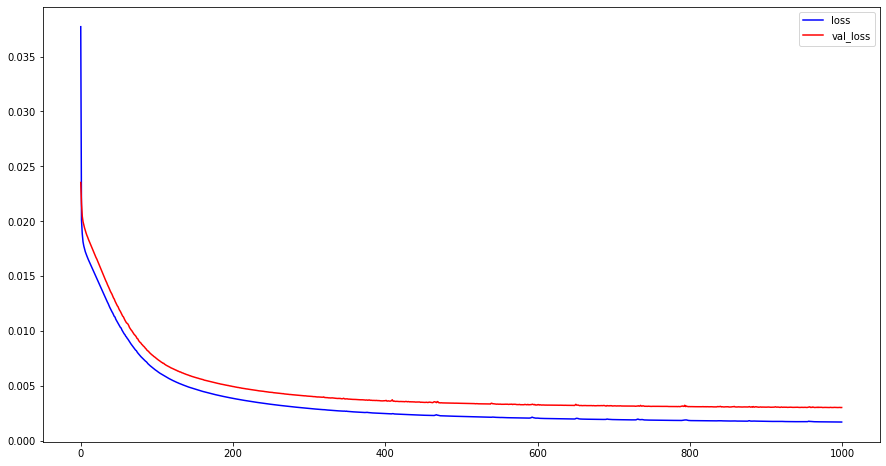

In [154]:
plt.figure(figsize=(15,8))
plt.plot(historylab.history["loss"], color='blue')
plt.plot(historylab.history["val_loss"], color='red')
plt.legend(['loss','val_loss'])

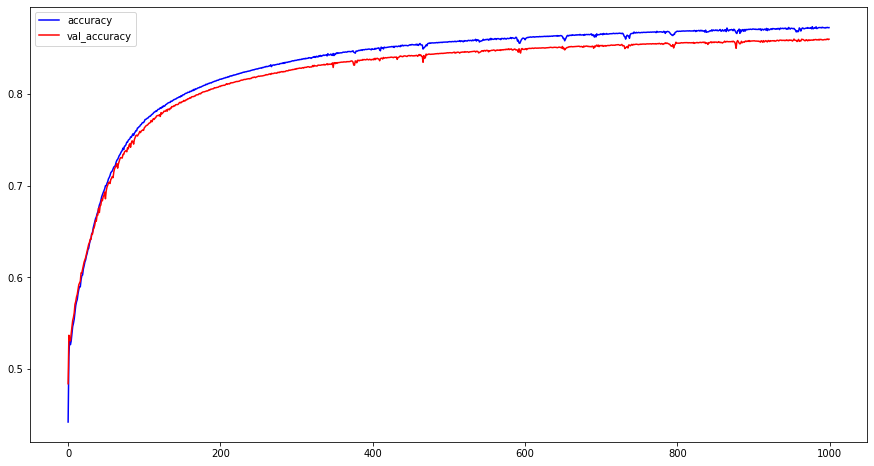

In [155]:
plt.figure(figsize=(15,8))
plt.plot(historylab.history["accuracy"], color='blue')
plt.plot(historylab.history["val_accuracy"], color='red')
plt.legend(['accuracy','val_accuracy'])

In [129]:
predictions = labmodel.predict(X)

In [130]:
predictions.shape

(496, 224, 224, 2)

In [131]:
predim = []

for i, im in enumerate(X):
    image = np.zeros((224, 224, 3))
    image[:, :, 0] = im[:, :, 0]*100.
    image[:, :, 1:] = predictions[i, :, :, :]*128.

    image = lab2rgb(image)
    predim.append(image)

predim = np.array(predim)
predim.shape

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 247 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 3 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 10 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color d

(496, 224, 224, 3)

In [132]:
predictions.max(), predictions.min()

(0.7733776, -0.77274466)

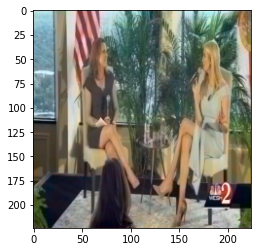

In [133]:
plt.imshow(predim[160])

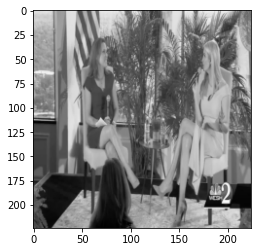

In [134]:
plt.imshow(X[160])

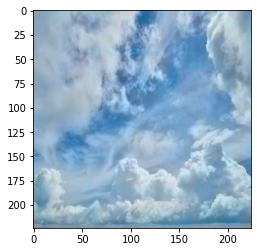

In [135]:
plt.imshow(predim[19])

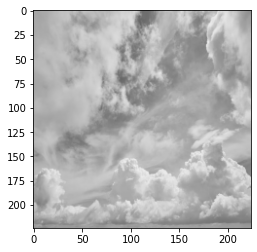

In [136]:
plt.imshow(X[19])

In [137]:
def prepare_image_for_lab_model(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_image(image, channels=3)
    image = resize(image, output_shape=(224, 224))
    image = rgb2lab(image)
    image = image[:, :, 0]/100.
    image = gray2rgb(image)
    return image

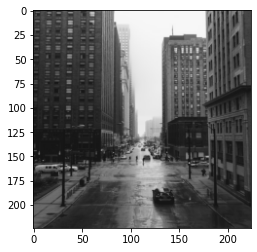

In [138]:
image_input = prepare_image_for_lab_model("/content/photo-1493928841026-e1ab0a590a61.jpg")
plt.imshow(image_input)

In [139]:
pred_image = labmodel.predict(np.expand_dims(image_input, axis=0))
pred_image = np.squeeze(pred_image)

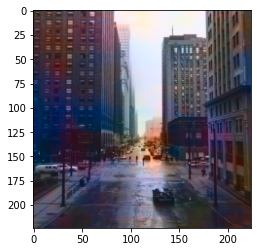

In [140]:
x = np.zeros((224, 224, 3))
x[:, :, 0] = image_input[:, :, 0]*100. 
x[:, :, 1:] = pred_image * 128.

pred_image = lab2rgb(x)
plt.imshow(pred_image)

In [141]:
labmodel.save("labmodel")

INFO:tensorflow:Assets written to: labmodel/assets


In [143]:
!zip -r labmodel.zip /content/labmodel

  adding: content/labmodel/ (stored 0%)
  adding: content/labmodel/assets/ (stored 0%)
  adding: content/labmodel/variables/ (stored 0%)
  adding: content/labmodel/variables/variables.index (deflated 71%)
  adding: content/labmodel/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/labmodel/saved_model.pb (deflated 91%)
  adding: content/labmodel/keras_metadata.pb (deflated 95%)


In [144]:
loadedmodel = tf.keras.models.load_model("/content/labmodel")

In [145]:
loadedmodel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [163]:
loadedmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [164]:
historyloadedmodel = loadedmodel.fit(X, Y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 3s 200ms/step - loss: -0.2860 - accuracy: 0.8595 - val_loss: -0.2596 - val_accuracy: 0.8543
Epoch 2/100
13/13 [==============================] - 2s 178ms/step - loss: -0.2866 - accuracy: 0.8607 - val_loss: -0.2603 - val_accuracy: 0.8526
Epoch 3/100
13/13 [==============================] - 2s 179ms/step - loss: -0.2878 - accuracy: 0.8655 - val_loss: -0.2603 - val_accuracy: 0.8497
Epoch 4/100
13/13 [==============================] - 2s 180ms/step - loss: -0.2858 - accuracy: 0.8579 - val_loss: -0.2577 - val_accuracy: 0.8481
Epoch 5/100
13/13 [==============================] - 2s 180ms/step - loss: -0.2857 - accuracy: 0.8591 - val_loss: -0.2586 - val_accuracy: 0.8455
Epoch 6/100
13/13 [==============================] - 2s 182ms/step - loss: -0.2866 - accuracy: 0.8576 - val_loss: -0.2599 - val_accuracy: 0.8508
Epoch 7/100
13/13 [==============================] - 2s 183ms/step - loss: -0.2875 - accuracy: 0.8652 - val_loss: -0.2595 - val_ac